In [1]:
import warnings
warnings.filterwarnings('ignore')

# Tratamento dos dados e Estatística Descritiva
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
sns.set_style('whitegrid')

# Processamento de Texto
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import nltk.corpus   
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# Nuvem de palavras
from wordcloud                        import WordCloud

# K-Means
from sklearn.cluster import KMeans
from sklearn.metrics                  import silhouette_samples, silhouette_score, v_measure_score
from sklearn import cluster

# SVD
from sklearn.decomposition import TruncatedSVD

# Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#pasta de trabalho
dir = 'C:\\Users\\amand\\OneDrive\\Documentos\\TCC PUC\\NewsFake'

In [3]:
files = glob.glob(dir + "/*.csv")

data_frame = pd.DataFrame()
content = []

for filename in files:
    
    # lendo conteúdo de um arquivo CSV
    df = pd.read_csv(filename, index_col=None)
    content.append(df)
  
# convertendo conteúdo para DataFrame
frame = pd.concat(content)
print(frame)

print('Datasets: \n   {}\n'.format(files))
print('Quantidade de Datasets:{}'.format(len(files)))

     Unnamed: 0     type                                     fact_check_url  \
0           889     post  https://healthfeedback.org/claimreview/false-c...   
1           890     post  https://factcheck.afp.com/trump-retweets-false...   
2           891      NaN  https://www.factcheck.org/2020/09/cdc-did-not-...   
3           892     post  https://healthfeedback.org/claimreview/masks-o...   
4           893  article  https://healthfeedback.org/claimreview/human-d...   
..          ...      ...                                                ...   
261         884     post  https://leadstories.com/hoax-alert/2020/04/Fac...   
262         885     post  https://leadstories.com/hoax-alert/2020/04/Fac...   
263         886     post  https://leadstories.com/hoax-alert/2020/04/Fac...   
264         887     post  https://leadstories.com/hoax-alert/2020/04/fac...   
265         888  article  https://www.politifact.com/factchecks/2020/may...   

                                              archi

In [4]:
dataset1 = pd.DataFrame()

frame[['https','vazio','fonte','resto']] = frame['news_url'].str.split('/',n=3,expand=True)
display(frame)

,Unnamed: 0,type,fact_check_url,archieve,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,https,vazio,fonte,resto
0,889,post,https://healthfeedback.org/claimreview/false-c...,https://archive.is/geT2g,https://www.facebook.com/drelizabethdc/posts/1...,NaN,NaN,NaN,NaN,The U.S. CDC quietly updated their numbers in ...,"""Log In or Sign Up to View""",you must log in to continue ..,NaN,NaN,"""""",https:,,www.facebook.com,drelizabethdc/posts/10224050038749877
1,890,post,https://factcheck.afp.com/trump-retweets-false...,http://archive.is/pZ2Pk,https://twitter.com/littllemel/status/12997914...,NaN,NaN,NaN,NaN,Social media posts shared thousands of times a...,"""""",we 've detected that javascript is disabled in...,NaN,NaN,"""""",https:,,twitter.com,littllemel/status/1299791452105474057
2,891,NaN,https://www.factcheck.org/2020/09/cdc-did-not-...,https://projects.propublica.org/politwoops/twe...,NaN,NaN,NaN,NaN,NaN,The CDC updated the COVID-19 number to admit t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,892,post,https://healthfeedback.org/claimreview/masks-o...,https://archive.vn/k8PJk,https://www.facebook.com/120381895036072/posts...,NaN,NaN,NaN,NaN,Either masks work or they don’t; if masks work...,"""Log In or Sign Up to View""",do you want to join facebook ?.,NaN,NaN,"""""",https:,,www.facebook.com,120381895036072/posts/852611835146404
4,893,article,https://healthfeedback.org/claimreview/human-d...,https://archive.is/Af8Xi,https://pieceofmindful.com/2020/04/06/bombshel...,NaN,NaN,NaN,NaN,The RT-PCR test for the virus that causes COVI...,"""BOMBSHELL: WHO Coronavirus PCR Test Primer Se...",this was important enough that i wanted to get...,this was important enough that i wanted to get...,2020-04-06T17:27:39+00:00,"""""",https:,,pieceofmindful.com,2020/04/06/bombshell-who-coronavirus-pcr-test-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,884,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://web.archive.org/web/20200422222546/htt...,https://www.facebook.com/BrokerCam/posts/11001...,NaN,NaN,NaN,NaN,Trey Gowdy said coronavirus shutdowns were sus...,"""Log In or Sign Up to View""",do you want to join facebook ?.,NaN,NaN,"""""",https:,,www.facebook.com,BrokerCam/posts/1100133597015152
262,885,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://web.archive.org/web/20200423115049/htt...,https://www.facebook.com/watch/?v=619001568957940,NaN,NaN,NaN,NaN,All elective or non-emergency surgeries are ba...,"""Top Scientist: More Cancer Deaths DUE to Lock...",in the uk the director of king college london ...,top scientist more cancer deaths due to lockdo...,NaN,"""""",https:,,www.facebook.com,watch/?v=619001568957940
263,886,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://web.archive.org/web/20200423200450/htt...,https://www.facebook.com/photo.php?fbid=273325...,NaN,NaN,NaN,NaN,U.S. House Speaker Nancy Pelosi was in Wuhan C...,"""Viviane Dinehart""",see more of viviane dinehart on facebook.,NaN,NaN,"""""",https:,,www.facebook.com,photo.php?fbid=273325727166662&set=a.168287547...
264,887,post,https://leadstories.com/hoax-alert/2020/04/fac...,http://web.archive.org/web/20200430171759/http...,https://www.facebook.com/CaptRandall/posts/102...,NaN,NaN,NaN,NaN,U.S. House Speaker Nancy Pelosi was in Wuhan C...,"""Randall Thompson""",see more of randall thompson on facebook.,pelosi was in wouhan china 6 days after the im...,NaN,"""""",https:,,www.facebook.com,CaptRandall/posts/10218956573997926


In [5]:
dataset1 = frame[['title','type','fonte']].copy()

display(dataset1)

,title,type,fonte
0,The U.S. CDC quietly updated their numbers in ...,post,www.facebook.com
1,Social media posts shared thousands of times a...,post,twitter.com
2,The CDC updated the COVID-19 number to admit t...,NaN,NaN
3,Either masks work or they don’t; if masks work...,post,www.facebook.com
4,The RT-PCR test for the virus that causes COVI...,article,pieceofmindful.com
...,...,...,...
261,Trey Gowdy said coronavirus shutdowns were sus...,post,www.facebook.com
262,All elective or non-emergency surgeries are ba...,post,www.facebook.com
263,U.S. House Speaker Nancy Pelosi was in Wuhan C...,post,www.facebook.com
264,U.S. House Speaker Nancy Pelosi was in Wuhan C...,post,www.facebook.com


In [6]:
#pasta de trabalho
dir2 = 'C:\\Users\\amand\\OneDrive\\Documentos\\TCC PUC\\ClaimFake'

In [7]:
files2 = glob.glob(dir2 + "/*.csv")

data_frame2 = pd.DataFrame()
content2 = []

for filename in files2:
    
    # reading content of csv file
    # content.append(filename)
    df = pd.read_csv(filename, index_col=None)
    content2.append(df)
  
# convertendo conteúdo para data frame
frame2 = pd.concat(content2)
print(frame2)

print('Datasets: \n   {}\n'.format(files2))
print('Quantidade de Datasets:{}'.format(len(files2)))

    Unnamed: 0        fact_check_url  \
0       100000  medicalnewstoday.com   
1       100001  medicalnewstoday.com   
2       100002  medicalnewstoday.com   
3       100003  medicalnewstoday.com   
4       100004  medicalnewstoday.com   
5       100005  medicalnewstoday.com   
6       100006  medicalnewstoday.com   
7       100007  medicalnewstoday.com   
8       100008  medicalnewstoday.com   
9       100009  medicalnewstoday.com   
10      100010  medicalnewstoday.com   
11      100011  medicalnewstoday.com   
12      100012  medicalnewstoday.com   
13      100013  medicalnewstoday.com   
14      100014  medicalnewstoday.com   
15      100015  medicalnewstoday.com   
16      100016  medicalnewstoday.com   
17      100017  medicalnewstoday.com   
18      100018  medicalnewstoday.com   
19      100019  medicalnewstoday.com   
20      100020  medicalnewstoday.com   
21      100021  medicalnewstoday.com   
22      100022  medicalnewstoday.com   
23      100023  medicalnewstoday.com   


In [8]:
dataset2 = pd.DataFrame()

dataset2 = frame2[['title']].copy()
dataset2.loc[:, 'type'] = 'article'
dataset2.loc[:, 'fonte'] = 'www.medicalnewstoday.com'

display(dataset2)

,title,type,fonte
0,"""Spraying chlorine or alcohol on the skin kill...",article,www.medicalnewstoday.com
1,"""Only older adults and young people are at risk""",article,www.medicalnewstoday.com
2,"""Children cannot get COVID-19""",article,www.medicalnewstoday.com
3,"""COVID-19 is just like the flu""",article,www.medicalnewstoday.com
4,"""Everyone with COVID-19 dies""",article,www.medicalnewstoday.com
5,"""Cats and dogs spread coronavirus""",article,www.medicalnewstoday.com
6,"""Face masks always protect against coronavirus""",article,www.medicalnewstoday.com
7,"""Hand dryers kill coronavirus""",article,www.medicalnewstoday.com
8,"""SARS-CoV-2 is just a mutated form of the comm...",article,www.medicalnewstoday.com
9,"""You have to be with someone for 10 minutes to...",article,www.medicalnewstoday.com


In [9]:
#pasta de trabalho
dir3 = 'C:\\Users\\amand\\OneDrive\\Documentos\\TCC PUC'

In [10]:
files3 = glob.glob(dir3 + "/*.csv")

data_frame3 = pd.DataFrame()
content3 = []

for filename in files3:
    
    # reading content of csv file
    # content.append(filename)
    df = pd.read_csv(filename, index_col=None)
    content3.append(df)
  
# convertendo conteúdo em um dataframe
frame3 = pd.concat(content3)
print(frame3)

print('Datasets: \n   {}\n'.format(files3))
print('Quantidade de Datasets:{}'.format(len(files3)))

        id                                              tweet label
0        1  The CDC currently reports 99031 deaths. In gen...  real
1        2  States reported 1121 deaths a small rise from ...  real
2        3  Politically Correct Woman (Almost) Uses Pandem...  fake
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4        5  Populous states can generate large case counts...  real
...    ...                                                ...   ...
2135  2136  Donald Trump wrongly claimed that New Zealand ...  fake
2136  2137  Current understanding is #COVID19 spreads most...  real
2137  2138  Nothing screams “I am sat around doing fuck al...  fake
2138  2139  Birx says COVID-19 outbreak not under control ...  fake
2139  2140  Another 4422 new coronavirus cases have been c...  real

[8560 rows x 3 columns]
Datasets: 
   ['C:\\Users\\amand\\OneDrive\\Documentos\\TCC PUC\\Constraint_Train.csv', 'C:\\Users\\amand\\OneDrive\\Documentos\\TCC PUC\\Constraint_Val.csv']


In [11]:
dict = {'id': 'id',
        'tweet': 'title',
        'label': 'label'}

frame3.rename(columns=dict,
          inplace=True)

dataset3 = pd.DataFrame()

dataset3 = frame3[['title']].copy().loc[frame3['label'] == 'fake']
dataset3.loc[:, 'type'] = 'tweet'
dataset3.loc[:, 'fonte'] = 'twitter.com'

display(dataset3)

#conferindo se pegou todas as linhas "fake"

fake_frame = frame3.loc[frame3['label'] == 'fake']

print ('Quantidade de linhas com Fake News:{}'.format(len(fake_frame)))

,title,type,fonte
2,Politically Correct Woman (Almost) Uses Pandem...,tweet,twitter.com
7,Obama Calls Trump’s Coronavirus Response A Cha...,tweet,twitter.com
8,"???Clearly, the Obama administration did not l...",tweet,twitter.com
9,Retraction—Hydroxychloroquine or chloroquine w...,tweet,twitter.com
11,The NBA is poised to restart this month. In Ma...,tweet,twitter.com
...,...,...,...
2131,The novel coronavirus was “man-made.”,tweet,twitter.com
2133,Swine flu virus is more dangerous than the nov...,tweet,twitter.com
2135,Donald Trump wrongly claimed that New Zealand ...,tweet,twitter.com
2137,Nothing screams “I am sat around doing fuck al...,tweet,twitter.com


Quantidade de linhas com Fake News:4080


In [12]:
base_final = pd.DataFrame()
base_final = pd.concat([dataset1, dataset2, dataset3])

display(base_final)

base_final.loc[base_final.fonte == 'twitter.com','type'] = 'tweet'

display(base_final)

,title,type,fonte
0,The U.S. CDC quietly updated their numbers in ...,post,www.facebook.com
1,Social media posts shared thousands of times a...,post,twitter.com
2,The CDC updated the COVID-19 number to admit t...,NaN,NaN
3,Either masks work or they don’t; if masks work...,post,www.facebook.com
4,The RT-PCR test for the virus that causes COVI...,article,pieceofmindful.com
...,...,...,...
2131,The novel coronavirus was “man-made.”,tweet,twitter.com
2133,Swine flu virus is more dangerous than the nov...,tweet,twitter.com
2135,Donald Trump wrongly claimed that New Zealand ...,tweet,twitter.com
2137,Nothing screams “I am sat around doing fuck al...,tweet,twitter.com


,title,type,fonte
0,The U.S. CDC quietly updated their numbers in ...,post,www.facebook.com
1,Social media posts shared thousands of times a...,tweet,twitter.com
2,The CDC updated the COVID-19 number to admit t...,NaN,NaN
3,Either masks work or they don’t; if masks work...,post,www.facebook.com
4,The RT-PCR test for the virus that causes COVI...,article,pieceofmindful.com
...,...,...,...
2131,The novel coronavirus was “man-made.”,tweet,twitter.com
2133,Swine flu virus is more dangerous than the nov...,tweet,twitter.com
2135,Donald Trump wrongly claimed that New Zealand ...,tweet,twitter.com
2137,Nothing screams “I am sat around doing fuck al...,tweet,twitter.com


In [13]:
base_final.loc[:, 'fonte'] = base_final['fonte'].apply(lambda x: 'Twitter' if x == 'twitter.com'
                                                       else 'Facebook' if x == 'www.facebook.com'
                                                       else 'Instagram' if x == 'www.instagram.com'
                                                       else 'Youtube' if x == 'www.youtube.com'
                                                       else 'Website')

display(base_final)

,title,type,fonte
0,The U.S. CDC quietly updated their numbers in ...,post,Facebook
1,Social media posts shared thousands of times a...,tweet,Twitter
2,The CDC updated the COVID-19 number to admit t...,NaN,Website
3,Either masks work or they don’t; if masks work...,post,Facebook
4,The RT-PCR test for the virus that causes COVI...,article,Website
...,...,...,...
2131,The novel coronavirus was “man-made.”,tweet,Twitter
2133,Swine flu virus is more dangerous than the nov...,tweet,Twitter
2135,Donald Trump wrongly claimed that New Zealand ...,tweet,Twitter
2137,Nothing screams “I am sat around doing fuck al...,tweet,Twitter


In [14]:
base_final.duplicated().value_counts()

False    4989
True       13
dtype: int64

In [15]:
#removendo valores duplicados
base_final.drop_duplicates(inplace=True)

base_final.duplicated().value_counts()

False    4989
dtype: int64

In [16]:
base_final.loc[:, 'Tamanho_Texto'] = base_final['title'].apply(lambda x: len(x))

display(base_final)

,title,type,fonte,Tamanho_Texto
0,The U.S. CDC quietly updated their numbers in ...,post,Facebook,144
1,Social media posts shared thousands of times a...,tweet,Twitter,218
2,The CDC updated the COVID-19 number to admit t...,NaN,Website,121
3,Either masks work or they don’t; if masks work...,post,Facebook,103
4,The RT-PCR test for the virus that causes COVI...,article,Website,133
...,...,...,...,...
2131,The novel coronavirus was “man-made.”,tweet,Twitter,37
2133,Swine flu virus is more dangerous than the nov...,tweet,Twitter,61
2135,Donald Trump wrongly claimed that New Zealand ...,tweet,Twitter,241
2137,Nothing screams “I am sat around doing fuck al...,tweet,Twitter,184


In [17]:
#separando hashtags
hash_frame = base_final['title'].tolist()
list_hashtags=[]
for text in hash_frame:
    for i in text.split():
        if i[0]=='#':
            list_hashtags.append(i)
            ''.join(list_hashtags)
            
hashtags = ','.join(list_hashtags)

df_hash = pd.DataFrame(list_hashtags, columns=['hashtag'])
display(df_hash)

,hashtag
0,#fakenews?Ó
1,#NotMyPresident
2,#MAGAÓ
3,#KeepUsClosed.”
4,#coronavirus
...,...
2022,#auspol
2023,#coronavirusFacts
2024,#Corona
2025,#COVID19


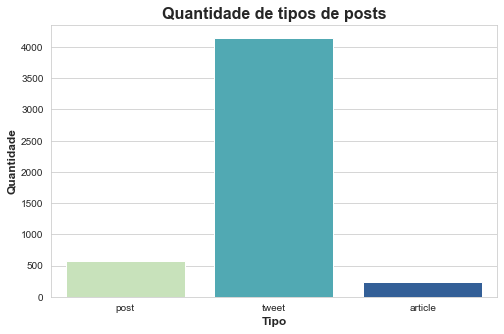

In [18]:
#Countplot do comparativo da quantidade total de tipo de "news"
fig = plt.subplots(figsize =(8,5))
sns.countplot(base_final['type'],palette='YlGnBu')
plt.title('Quantidade de tipos de posts', fontweight='bold', fontsize=16)
plt.xlabel('Tipo',fontweight='bold',fontsize=12)
plt.ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()

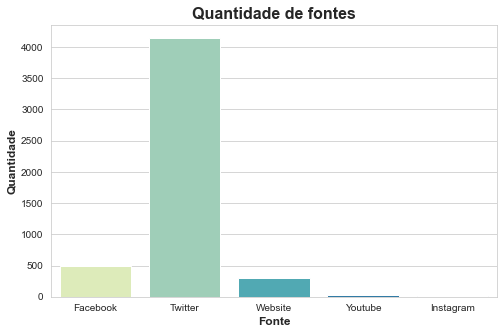

In [19]:
#Countplot do comparativo da quantidade total de tipo de fonte
fig = plt.subplots(figsize =(8,5))
sns.countplot(base_final['fonte'],palette='YlGnBu')
plt.title('Quantidade de fontes', fontweight='bold', fontsize=16)
plt.xlabel('Fonte',fontweight='bold',fontsize=12)
plt.ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()

<AxesSubplot:title={'center':'Quantidade de textos por tipo'}, ylabel='title'>

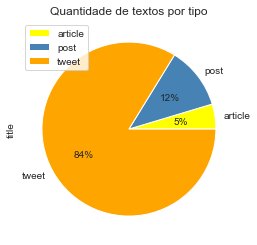

In [20]:
# Plotting the pie chart for above dataframe
base_final.groupby(['type']).count().plot(
    kind='pie', y='title', autopct='%1.0f%%',
    colors = ['yellow','steelblue','orange'],
    title='Quantidade de textos por tipo')

<AxesSubplot:title={'center':'Proporção de outras redes sociais'}, ylabel='title'>

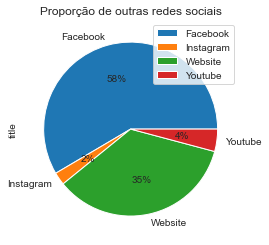

In [21]:
# Plotting the pie chart for above dataframe
media_frame = base_final.loc[base_final['type'] != 'tweet']
media_frame.groupby(['fonte']).count().plot(
    kind='pie', y='title', autopct='%1.0f%%',
    title='Proporção de outras redes sociais')

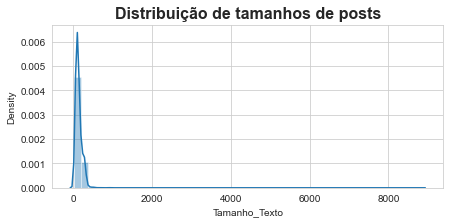

In [22]:
#gráfico de distribuição tamanho dos titulos de noticias/posts/tweets
fig = plt.subplots(figsize=(7,3))
g = sns.distplot(base_final['Tamanho_Texto'])
plt.title('Distribuição de tamanhos de posts', fontweight='bold', fontsize=16)
plt.show()

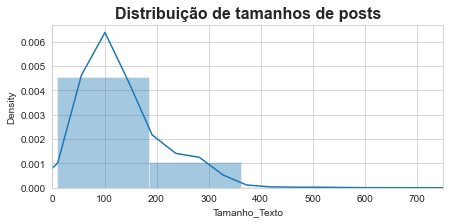

In [23]:
#gráfico de distribuição tamanho dos titulos de noticias/posts/tweets
fig = plt.subplots(figsize=(7,3))
g = sns.distplot(base_final['Tamanho_Texto'])
g.set(xlim=(0,750))
plt.title('Distribuição de tamanhos de posts', fontweight='bold', fontsize=16)
plt.show()

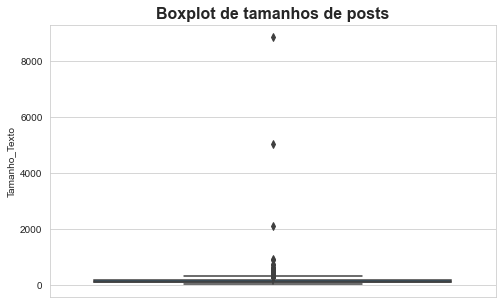

In [24]:
#boxplot tamanho dos titulos de noticias/posts/tweets
fig,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=base_final['Tamanho_Texto'])
plt.title('Boxplot de tamanhos de posts', fontweight='bold', fontsize=16)
plt.show()

In [25]:
base_final['Tamanho_Texto'].describe()

count    4989.000000
mean      136.202646
std       163.619348
min         9.000000
25%        79.000000
50%       112.000000
75%       165.000000
max      8846.000000
Name: Tamanho_Texto, dtype: float64

In [26]:
base_final[base_final['Tamanho_Texto'] == 9]

,title,type,fonte,Tamanho_Texto
508,ÒBreaking,post,Facebook,9


In [27]:
pd.options.display.max_colwidth = 4000
base_final[base_final['Tamanho_Texto'] == 8846]

,title,type,fonte,Tamanho_Texto
270,"Amoxi"" Capsule made in US is the only medicine that can completely cure COVID-19.\nEgyptian Health Minister arrive in Italy with secret coronavirus cure.\n Dr Charles Lieber a Harvard professor has been arrested in the USA for manufacturing the coronavirus and selling it to China. A video news report from WCVB a TV station in Boston Massachusetts is shared with the Facebook post.\nMountain Matterhorn in Switzerland was lit in three colours of Indian flag as a token of gratitude to India for sending Hydroxychloroquine.\nAl-Azhar Imam said he is considering exceptions on Ramadan fasting as the research says that the mouth must be kept wet to prevent COVID-19\n Japanese Nobel Tasuku Honjo says coronavirus was created in the Wuhan laboratory\nA man collapses in 5 minutes after showing COVID-19 symptoms in India.\nCelebrities spreading misinformation about coronavirus and the Janata curfew in India.\n Multiple posts shared repeatedly on Facebook and Twitter since March 2020 claim that Israel has reported zero deaths from the novel coronavirus which causes the disease COVID-19. The posts also claim Israeli citizens have protected themselves from COVID-19 by drinking a remedy of hot water lemon and baking soda which purportedly “kills” the virus.\n CDC suddenly lost 30000 deaths from coronavirus from its data thus proving the virus is not as serious as it seems.\nPhotos of coronavirus patients being treated on the road in Italy.\nIndian actor Shah Rukh Khan donated money to Pakistan to fight coronavirus and did not help India at all.\nRussian President Vladimir Putin has ordered Russia’s population to stay at home for 15 days or face five years in jail.\nIndian Army has set-up a 1000 bed quarantine facility in Rajasthan's Barmer.\nLeonardo Da Vinci Hospital a COVID-19 reference hospital in Fortaleza Brazil is empty. A video ""proves"" there was no one at the areas open to the public.\n President Trump's claim that he inherited no ventilators from the Obama administration.\nAn audio where an unidentified person links the virus that causes COVID-19 with the massive flu vaccination campaign.\nBlack body bags being referred to as deaths in New York and the reason a lockdown is essential.\nMustard oil prevents a person from getting infected with COVID-19.\nNorth Carolina’s health department is ""telling hospitals that if they decide to do elective surgeries they won’t be eligible to receive (protective equipment) from the state.”\n After coronavirus pandemic Chinese president said it's China's time to lead the world.\nThe nurses that Boris Johnson claimed saved his life are not registered in the UK.\nA claim that India’s Ministry of Home Affairs has made it a “punishable offense” for citizens to publish posts on social media about the novel coronavirus has been shared repeatedly on Facebook Twitter and WhatsApp.\n Says Nancy Pelosi was “caught trying to include abortion funding in bill to combat coronavirus.”\nA video of a man rebuking foreigners has been viewed thousands of times on social media alongside a claim that the Guinean government has ordered the arrest of all Chinese nationals in the country while awaiting the safe return of Guineans from China.\n The U.S. is the only country on earth that is protesting being locked down.\nPhoto of Kurnool MLA (Hafeez Khan) making a nurse to touch the feet of a religious head in Viswabharathi Medical College who had to come to the COVID-19 quarantine facility.\nNew York State Governor shows data that proves that isolation is ineffective against COVID-19.\nHomeopathic product Oscillococcinum protects against COVID-19.\nCDC admitted to lying about COVID-19 death stats.\nNotice for preparing emergency drugs was released on social media for alumni of Seoul National University College of Medicine.\nBelgian doctors turn their back on WHO director.\nDr. Li Wenliang (the Chinese whistleblower doctor) has proposed that drinking tea can cure COVID-19.\nAny person ar

In [30]:
#Declarando funções para Stop Words e Stemming

# retira Stop Words
def tiraStopWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# aplica Stemming
def aplicaStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# retira palavras com menos de 2 caracteres e com mais de 21 caracteres
def tiraMinMaxCaracteres(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [31]:
texto = base_final['title'].tolist()

def processaTexto(texto, lingua):   
    stopwords = nltk.corpus.stopwords.words(lingua)
    param_stemmer = SnowballStemmer(lingua)
    
    for title in texto:
        ind = texto.index(title)
        texto[ind] = texto[ind].replace('@', '') #removendo @
        texto[ind] = texto[ind].replace(',', '') #removendo ,
        texto[ind] = texto[ind].rstrip('\n') #removendo espaço em branco
        texto[ind] = texto[ind].casefold() #tornando todas as letras minúsculas

        texto[ind] = re.sub('\W_',' ', texto[ind]) #tirando caracteres especiais
        texto[ind] = re.sub("\S*\d\S*"," ", texto[ind]) #tira números e palavras concatenados com nº,ex: h4ck3r
        texto[ind] = re.sub("\S*@\S*\s?"," ", texto[ind]) #tira palavras com @
        texto[ind] = re.sub(r'http\S+', '', texto[ind]) #tira URL com http
        texto[ind] = re.sub(r'www\S+', '', texto[ind]) #tira URL com www
        
        listOfTokens = word_tokenize(texto[ind])
        minMaxWord = tiraMinMaxCaracteres(listOfTokens)
        
        listOfTokens = tiraStopWords(listOfTokens, stopwords)
        listOfTokens = tiraStopWords(listOfTokens, minMaxWord)
        listOfTokens = aplicaStemming(listOfTokens, param_stemmer)
        
        texto[ind]   = " ".join(listOfTokens)
        texto[ind] = unidecode(texto[ind])
    
    return texto

In [32]:
lingua = 'english'
texto = processaTexto(texto, lingua)

display(texto)

['u.s. cdc quiet updat number august show coronavirus death complet due coronavirus alon',
 'social media post share thousand time retweet presid donald trump claim u. center diseas control prevent cut nation death toll cite cdc comorbid chart',
 'cdc updat number admit death record actual die',
 'either mask work mask work physic distanc lockdown unnecessari',
 'rt-pcr test virus caus detect human dna chromosom therefor test give posit result',
 'governor main order restaur staff wear dog cone-styl face visor precautionari measur',
 'greatest trick u.s. cdc ever pull convinc world sick without symptom',
 'surviv rate close without vaccin exact purpos new vaccin',
 'mislead claim vaccin spread plandem video',
 'photo show democrat presidenti nomine joe biden run mate sen. kamala harri abid public health recommend regard face mask',
 'facebook post share ten thousand time democrat nation convent critic joe biden kamala harri top democrat appear crowd without mask',
 'hydroxychloroquin u

In [33]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texto)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf
final_df

,_allow,_american,_an,_bill,_blackie__,_china,_civil,_claim,_coronavirus,_in,...,zombi,zone,zoo,zoodirector,zookeep,zoolog,zoom,zubymus,zurich,zyphr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


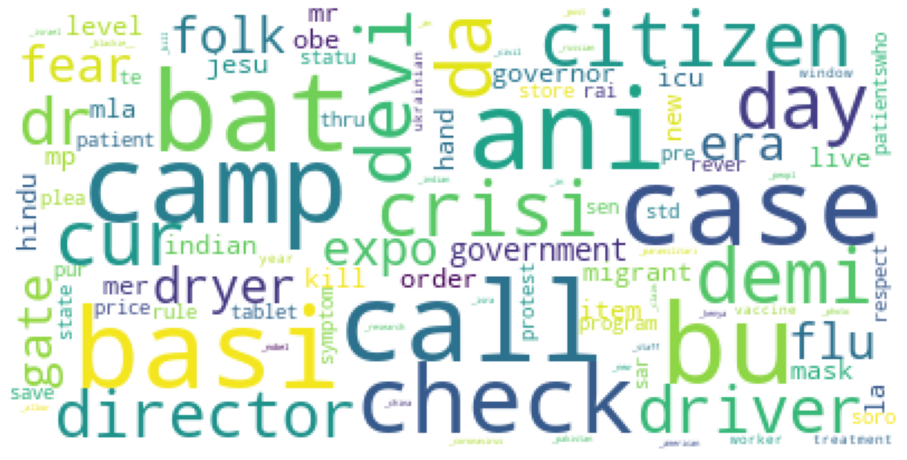

In [35]:
conteudo = ' '.join(final_df)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(conteudo)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

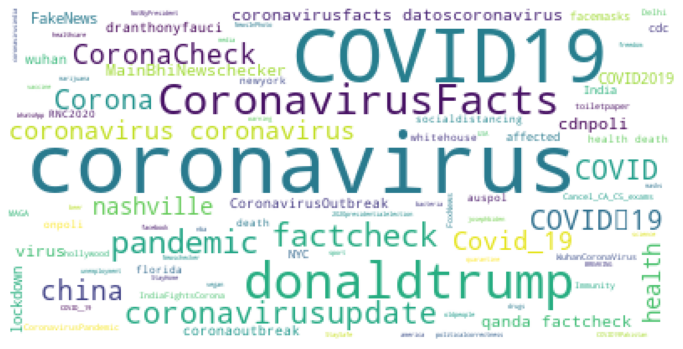

In [36]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(hashtags)
plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Number of components = 4 and explained variance = 0.01954175281329987
Number of components = 10 and explained variance = 0.04538669898055597
Number of components = 15 and explained variance = 0.06275806727518934
Number of components = 20 and explained variance = 0.07720751907899924
Number of components = 50 and explained variance = 0.14217362342788825
Number of components = 100 and explained variance = 0.21785863544916623
Number of components = 150 and explained variance = 0.2757758167882354
Number of components = 200 and explained variance = 0.32395039040738316
Number of components = 500 and explained variance = 0.522443734027245
Number of components = 700 and explained variance = 0.6095066065395041
Number of components = 800 and explained variance = 0.645100189144612
Number of components = 900 and explained variance = 0.676766115990076
Number of components = 1000 and explained variance = 0.7050742228805345
Number of components = 1500 and explained variance = 0.8121428095089026
Number

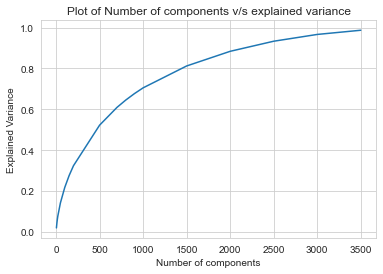

In [37]:
# acha um número ótimo de componentes a ser utilizado para o Truncated SVD
n_comp = [4,10,15,20,50,100,150,200,500,700,800,900,1000,1500,2000,2500,3000,3500] 
explained = [] # variancia explicada para cada número de componente aplicado no Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(final_df)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [38]:
svd = TruncatedSVD(n_components=1500)
final_df_svd = svd.fit_transform(final_df)

In [39]:
final_df_svd

array([[ 0.20226363,  0.0302006 , -0.09357665, ..., -0.00130821,
         0.02659402,  0.00343038],
       [ 0.2059345 ,  0.04644306,  0.21507248, ...,  0.00516016,
        -0.00960556,  0.00174346],
       [ 0.11593817, -0.0019085 , -0.01874518, ...,  0.00154881,
        -0.00900134, -0.00558052],
       ...,
       [ 0.21699933, -0.09301402, -0.12274473, ..., -0.00110416,
        -0.00209927,  0.0202458 ],
       [ 0.04634403,  0.00662659, -0.00045927, ...,  0.00436057,
         0.0068847 ,  0.00490635],
       [ 0.10480653, -0.01426452,  0.04040073, ..., -0.01536586,
        -0.00137261, -0.0104449 ]])

In [40]:
def numero_k(mink, maxk, X):
  # Descobrindo qual o melhor valor de k
  wcss = []
  for i in range(mink,maxk):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=200, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

  # Plot do gráfico do cotovelo para visualizar o melhor valor de k
  plt.figure(figsize=(10,5))
  plt.plot(range(mink,maxk), wcss, 'bx-')
  plt.xlabel('Valor de k')
  plt.ylabel('Inertia')
  plt.title('Método do Cotovelo exibindo número ótimo de k')
  plt.show()

  return

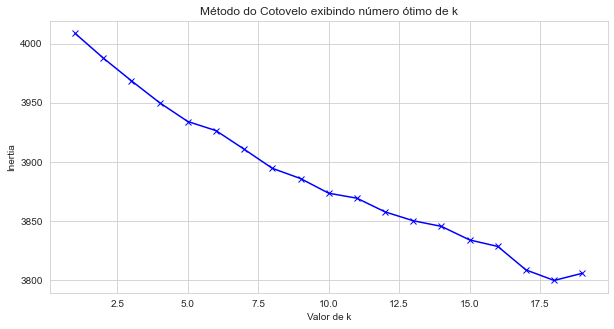

In [41]:
numero_k(1, 20, final_df_svd)

In [42]:
k = 10

for n_clusters in range(2 , k):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(final_df_svd)
    silhouette_avg = silhouette_score(final_df_svd, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette médio é :", silhouette_avg)

Para n_clusters = 2 O score_silhouette médio é : 0.005254274853754393
Para n_clusters = 3 O score_silhouette médio é : 0.007017728531833164
Para n_clusters = 4 O score_silhouette médio é : 0.00797229732768544
Para n_clusters = 5 O score_silhouette médio é : 0.009922834385190428
Para n_clusters = 6 O score_silhouette médio é : 0.0112288933268856
Para n_clusters = 7 O score_silhouette médio é : 0.010679645401419344
Para n_clusters = 8 O score_silhouette médio é : 0.010405471587212478
Para n_clusters = 9 O score_silhouette médio é : 0.010574610022984808


In [43]:
k = 11
km = KMeans(algorithm='auto',
            copy_x=True,
            init='k-means++',
            max_iter=300,
            n_clusters=k,
            n_init=10,
            n_jobs=1,
            precompute_distances='auto',
            random_state=0,
            tol=0.0001,
            verbose=0)

In [44]:
km.fit(final_df_svd)

KMeans(n_clusters=11, n_jobs=1, precompute_distances='auto', random_state=0)

In [45]:
clusters = km.labels_
k_centers = km.cluster_centers_ 
original_space_centroids = svd.inverse_transform(k_centers)
order_centroids = original_space_centroids.argsort()[:, ::-1]

In [48]:
svd_cluster_topics = {}
for c in range(k):
    topic = ','.join([centroids.columns[i] for i in [ix for ix in order_centroids[c, :10]]])
    svd_cluster_topics[c] = topic
    print ("Cluster %i: " % c + topic)

Cluster 0: video,show,hospit,coronavirus,photo,patient,claim,doctor,bodi,dead
Cluster 1: use,check,fact,coronavirus,covid,news,virus,chloroquin,mask,chlorin
Cluster 2: die,coronavirus,peopl,doctor,hospit,one,itali,due,patient,vaccin
Cluster 3: post,facebook,claim,time,share,thousand,novel,twitter,multipl,view
Cluster 4: pandem,coronavirus,global,trump,say,claim,world,fake,health,show
Cluster 5: death,coronavirus,rate,number,cdc,flu,toll,caus,due,state
Cluster 6: coronavirus,test,case,virus,new,peopl,lockdown,india,posit,hospit
Cluster 7: cure,coronavirus,found,doctor,hydroxychloroquin,drink,water,develop,vaccin,lemon
Cluster 8: trump,presid,donald,donaldtrump,coronavirus,say,obama,test,american,claim
Cluster 9: vaccin,gate,bill,coronavirus,develop,peopl,claim,kill,trial,flu
Cluster 10: say,mask,wear,coronavirus,face,virus,peopl,protect,spread,infect


In [49]:
# Inserindo a classificação de cluster para cada título
labels = km.labels_ 
base_final["Cluster_Kmeans_SVD"] = labels

In [50]:
df_clusters = base_final["Cluster_Kmeans_SVD"].value_counts()
print(df_clusters)

6     2741
10     363
8      297
9      270
4      237
5      202
0      200
1      190
2      178
3      157
7      154
Name: Cluster_Kmeans_SVD, dtype: int64


In [51]:
pd.options.display.max_colwidth = 193
base_final.groupby('Cluster_Kmeans_SVD').head(1).sort_values(by='Cluster_Kmeans_SVD')

,title,type,fonte,Tamanho_Texto,Cluster_Kmeans_SVD
8,Misleading claims about COVID-19 vaccine spread by ‘Plandemic’ video,post,Facebook,68,0
45,Using nasopharyngeal swabs for COVID-19 testing is unnecessary; saliva samples from mouth swabs is an equivalent substitute,post,Facebook,123,1
13,Our chance of not dying from COVID-19 is 99.96%,post,Facebook,47,2
1,"Social media posts shared thousands of times and retweeted by President Donald Trump claim the U.S Centers for Disease Control and Prevention cut the national COVID-19 death toll by 94%, ci...",tweet,Twitter,218,3
19,An image appearing to be an publication by the World Health Organization (WHO) shows that the global health body does not recommend mask-wearing during the COVID-19 pandemic.,post,Facebook,174,4
0,The U.S. CDC quietly updated their numbers in August to show that only 6% of all coronavirus deaths were completely due to the coronavirus alone,post,Facebook,144,5
4,"The RT-PCR test for the virus that causes COVID-19 detects human DNA on chromosome 8, therefore all tests will give a positive result",article,Website,133,6
23,"Hydroxychloroquine, azithromycin and zinc cure COVID-19",post,Facebook,55,7
40,"Photo shows former President Barack Obama, Dr. Anthony Fauci and Melinda Gates at the “Wuhan lab in 2015.”",post,Facebook,106,8
7,"The survival rate of COVID-19 is close to 100% without a vaccine, so what exactly will the purpose of the new vaccine be?",post,Facebook,121,9


In [ ]:
plt.figure(figsize=(12,9))
dendrograma = dendrogram(linkage(final_df_svd, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Palavras')
plt.ylabel('Distância Euclidiana')

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(final_df_svd)
labels = hc.labels_

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices para cada cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # retorna score médio TF-IDF para cada palavra gerada no cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices com os top n_feats scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [ ]:
final_df_array = final_df.to_numpy()
n_feats = 20
dfs = get_top_features_cluster(final_df_array, previsoes, n_feats)
plotWords(dfs, 15)

In [ ]:
base_final["Cluster_Agglomerative"] = previsoes

df_clusters2 = base_final["Cluster_Agglomerative"].value_counts()
print(df_clusters2)

In [ ]:
pd.options.display.max_colwidth = 193
base_final.groupby('Cluster_Agglomerative').head(3).sort_values(by='Cluster_Agglomerative')

In [ ]:
fig = plt.subplots(figsize =(8,5))
sns.countplot(base_final['Cluster_Kmeans_SVD'],palette='YlGnBu')
plt.title('Quantidade de texto por Cluster', fontweight='bold', fontsize=16)
plt.xlabel('Cluster',fontweight='bold',fontsize=12)
plt.ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()

In [ ]:
fig = plt.subplots(figsize =(8,5))
sns.countplot(base_final['Cluster_Agglomerative'],palette='YlGnBu')
plt.title('Quantidade de texto por Cluster', fontweight='bold', fontsize=16)
plt.xlabel('Cluster',fontweight='bold',fontsize=12)
plt.ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()